<a href="https://www.kaggle.com/code/sepehrmoghani/data-analysis-for-transport-and-logistics?scriptVersionId=266481433" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Analysis — Transport & Logistics

This report analyses a sample of freight invoices for a fictional business. Each row represents a line item in a customer quote and includes both **operational fields** (origin/destination postcodes) and **physical attributes** (cubic size, weight) as well as **commercial fields** (original cost). The goal is to understand the data’s structure, quality, and key patterns (e.g., how cubic relates to weight; which postcodes dominate), and to run simple models/visualisations to support decision-making.

### 1) Imports (Code)

* **NumPy/Pandas** for data handling.
* **Matplotlib/Seaborn** for charts.
* **LinearRegression** (and KMeans) to use for linear regression for a simple relationship (Cubic vs Weight)

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### 2) Load data & rename columns

At this stage we read the excel file and rename some column names to more accurate names which is common when dealing with data from different sources.

In [2]:
df = pd.read_excel("/kaggle/input/business-quote-sample/Business Quote.xlsx")
df = df.rename(columns={
    'Calculated Distance': 'Connote Number', 
    'Service Type': 'Carrier', 
    'Unit Type': 'Service', 
    'Unit Value': 'Qty'
})
df.head()

,Date,From,To,Carrier,Service,Qty,Cubic Size,Weight,Original Cost,Connote Number
0,2023-09-04 10:00:00,2164,2320,carrier_E,Parcels Overnight,1,0.0010,22.0,26.80,sample_00001
1,2023-09-18 00:00:00,2526,2650,carrier_B,Fixed Price Premium,1,0.0050,3.0,15.53,sample_00002
2,2023-09-18 00:00:00,2526,6104,carrier_E,Australia Wide 1kg Satchel Overnight,1,0.0022,1.0,14.59,sample_00003
3,2023-09-18 00:00:00,2526,3629,carrier_E,Australia Wide 1kg Satchel Overnight,1,0.0022,1.0,14.59,sample_00004
4,2023-09-18 00:00:00,2526,3043,carrier_E,Australia Wide 3kg Satchel Overnight,1,0.0040,3.0,18.28,sample_00005


### 3) Focus on numeric columns

We’ll focus first on numeric fields (e.g., *Qty*, *Cubic Size*, *Weight*, *Original Cost*). If numbers are imported as strings, we will convert them to numeric types first.

In [3]:
# Removing none numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_dataset = df[numerical_columns]
numerical_dataset

,From,To,Qty,Cubic Size,Weight,Original Cost
0,2164,2320,1,0.0010,22.00,26.80
1,2526,2650,1,0.0050,3.00,15.53
2,2526,6104,1,0.0022,1.00,14.59
3,2526,3629,1,0.0022,1.00,14.59
4,2526,3043,1,0.0040,3.00,18.28
...,...,...,...,...,...,...
2152,2526,4073,1,0.5800,272.00,111.69
2153,4073,4350,1,0.0200,6.66,79.19
2154,2526,4073,1,0.6700,358.00,142.00
2155,3166,2450,1,0.1400,46.62,95.02


### 4) Visualise distributions of numeric features

Histograms show the spread, skew, and outliers. This helps decide if transformations or outlier handling are needed.

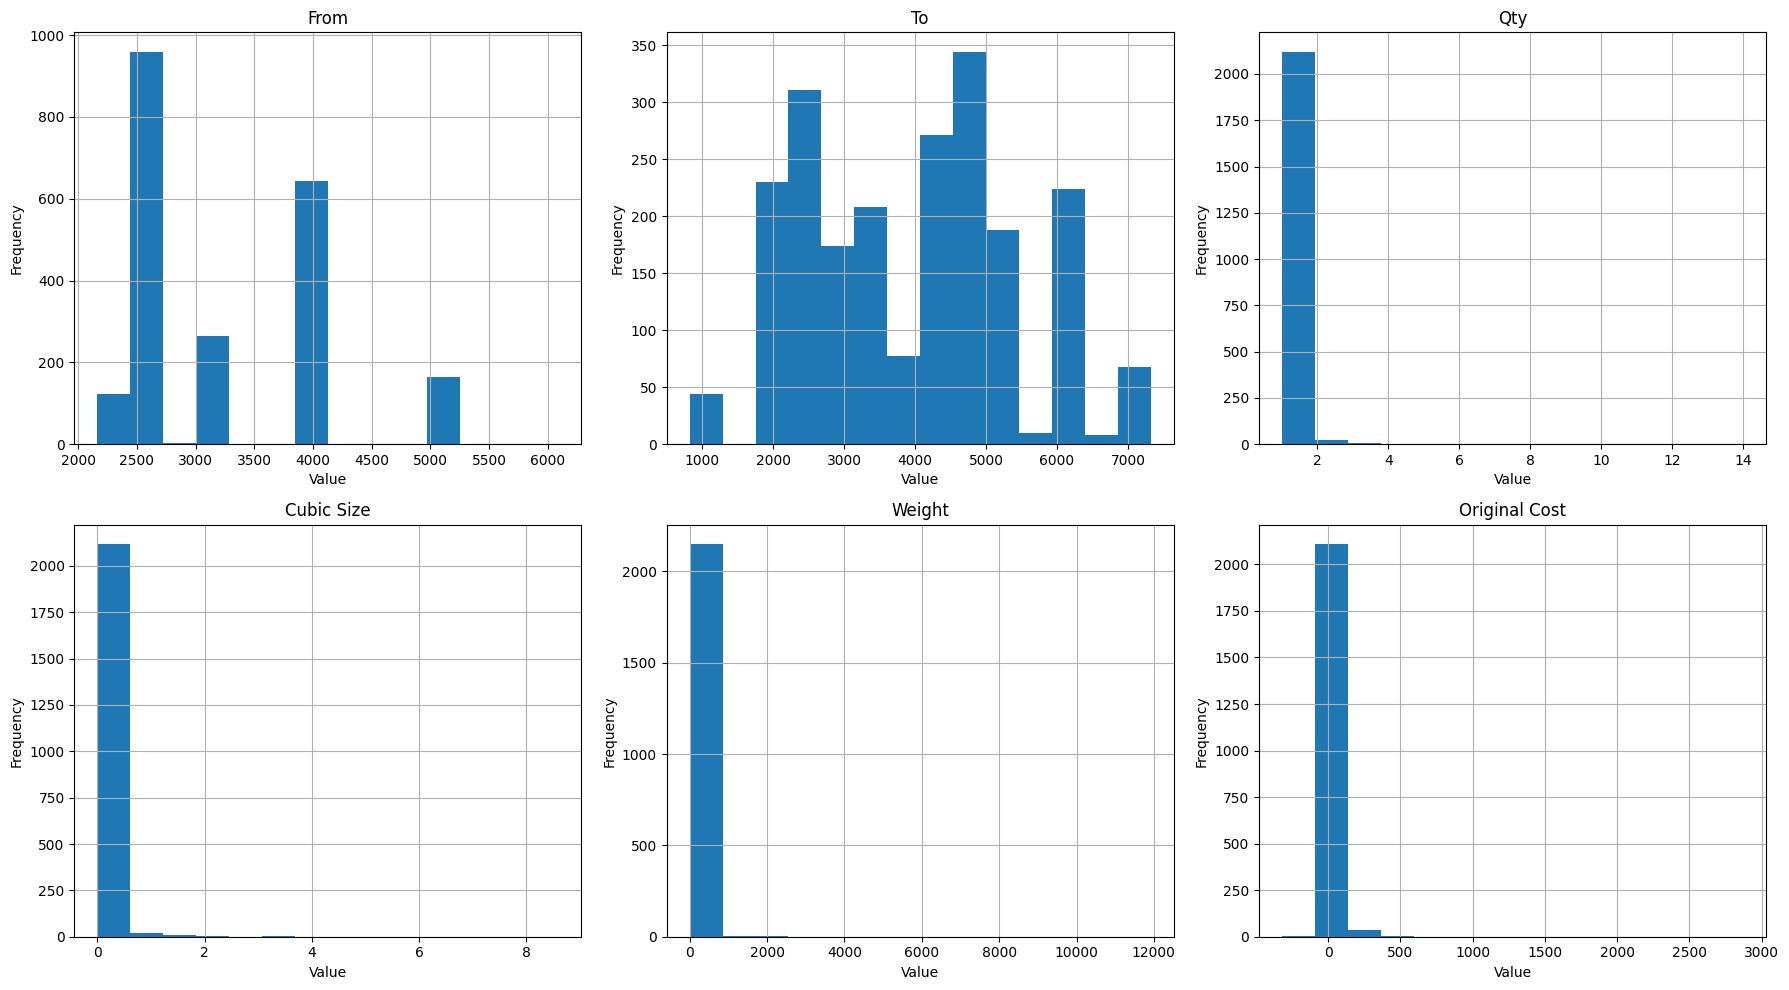

In [4]:
num_rows = 2 
num_cols = 3  
nbins = 14

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 10))

axes = axes.flatten()

for ax, col in zip(axes, numerical_dataset.columns[:num_rows*num_cols]):
    ax.hist(numerical_dataset[col].dropna(), bins=nbins)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True) 

plt.tight_layout()
plt.show()

### 5) Quick descriptive statistics


In [5]:
mean_of_qty = df['Qty'].mean()
mean_of_cs = df['Cubic Size'].mean()
mean_of_w = df['Weight'].mean()
mean_of_oc = df['Original Cost'].mean()

print("Mean Qty:", round(mean_of_qty, 3))
print("Mean Cubic Size:", round(mean_of_cs, 3))
print("Mean Weight:", round(mean_of_w, 3))
print("Mean Original Cost:", round(mean_of_oc, 3))

Mean Qty: 1.047
Mean Cubic Size: 0.051
Mean Weight: 24.854
Mean Original Cost: 32.434


### 6) Linear Relationship Between Cubic Size and Weight

To explore whether heavier freight items also occupy more cubic space, we use a **simple linear regression** model with *Cubic Size (m³)* as the independent variable (X) and *Weight (kg)* as the dependent variable (y).

The model estimates the best-fitting straight line using the **Ordinary Least Squares (OLS)** method, minimising the squared differences between observed and predicted weights. The fitted line has the form:

$
\hat{y} = \theta_0 + \theta_1 X
$

where

* ( $\theta_1$ ) is the **slope**, showing how much the weight changes per unit increase in cubic size, and
* ( $\theta_0$ ) is the **intercept**, the predicted weight when cubic size is zero.

After fitting the model, we plot the observed data points (scatter) and overlay the fitted regression line in red. This visualisation makes it easy to assess whether the relationship is roughly linear and how well the model represents the trend between cubic size and weight once outliers have been removed.


Slope (θ1): 703.1046913656932
Intercept (θ0): -10.84188562827898


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


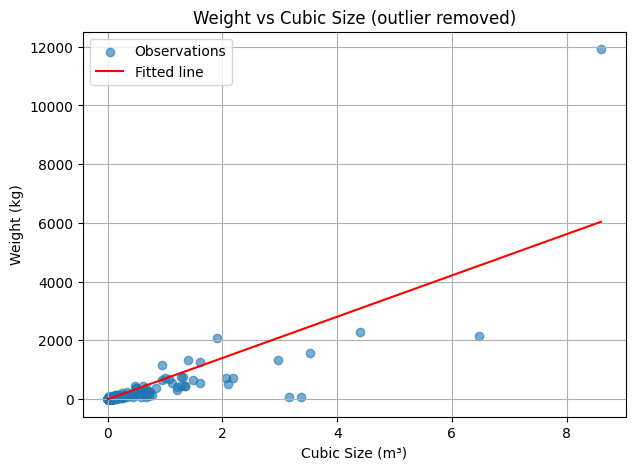

In [6]:
# Prepare X (Cubic Size) and y (Weight)
x = df[['Cubic Size']].dropna()
y = df['Weight'].loc[x.index]

# Fit Ordinary Least Squares (sklearn's LinearRegression)
model = LinearRegression()
model.fit(x, y)

theta1 = model.coef_[0]      # slope
theta0 = model.intercept_    # intercept
print("Slope (θ1):", theta1)
print("Intercept (θ0):", theta0)

# Predicted line
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_fitted = model.predict(x_line)

# Plot scatter and fitted line
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.6, label='Observations')
plt.plot(x_line, y_fitted, color='red', label='Fitted line')
plt.xlabel('Cubic Size (m³)')
plt.ylabel('Weight (kg)')
plt.title('Weight vs Cubic Size (outlier removed)')
plt.legend()
plt.grid(True)
plt.show()

### 7) Improving Linear Relationship Between Cubic Size and Weight

We expect a positive relationship (bigger cubic → heavier), but extreme outliers may distort the trend. We’ll remove a known outlier (Weight = 11,916) and fit a simple linear model to the remaining data.

Slope (θ1): 378.6992079702006
Intercept (θ0): 1.6139757893442415


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


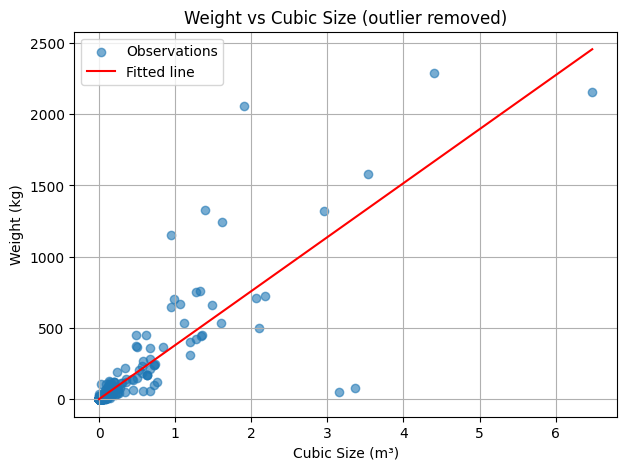

In [7]:
# Identify and remove a known extreme outlier (example)
index_outlier = df[df['Weight'] == 11916].index
df_removed = df.drop(index_outlier)

# Prepare X (Cubic Size) and y (Weight)
x = df_removed[['Cubic Size']].dropna()
y = df_removed['Weight'].loc[x.index]

# Fit Ordinary Least Squares (sklearn's LinearRegression)
model = LinearRegression()
model.fit(x, y)

theta1 = model.coef_[0]      # slope
theta0 = model.intercept_    # intercept
print("Slope (θ1):", theta1)
print("Intercept (θ0):", theta0)

# Predicted line
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_fitted = model.predict(x_line)

# Plot scatter and fitted line
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.6, label='Observations')
plt.plot(x_line, y_fitted, color='red', label='Fitted line')
plt.xlabel('Cubic Size (m³)')
plt.ylabel('Weight (kg)')
plt.title('Weight vs Cubic Size (outlier removed)')
plt.legend()
plt.grid(True)
plt.show()

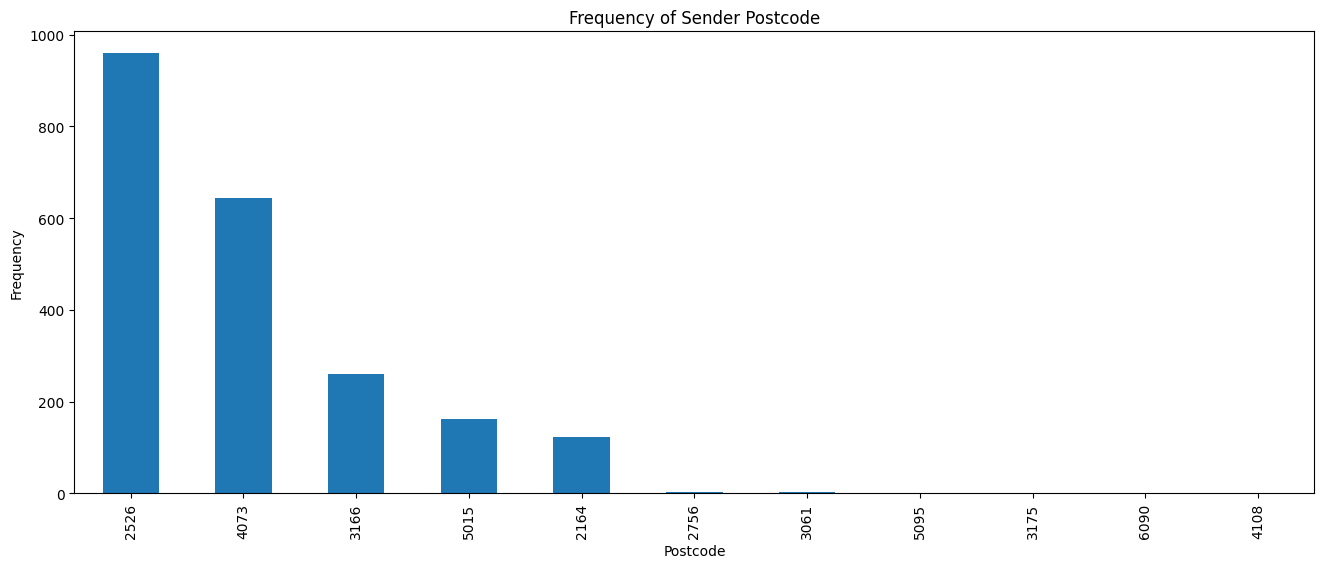

From
2526    959
4073    643
3166    261
5015    163
2164    123
2756      2
3061      2
5095      1
3175      1
6090      1
4108      1
Name: count, dtype: int64

In [8]:
from_value_counts = df['From'].value_counts()
plt.figure(figsize=(16, 6))
from_value_counts.plot(kind='bar')
plt.title('Frequency of Sender Postcode')
plt.xlabel('Postcode')
plt.ylabel('Frequency')
plt.show()

from_value_counts  # display the Series

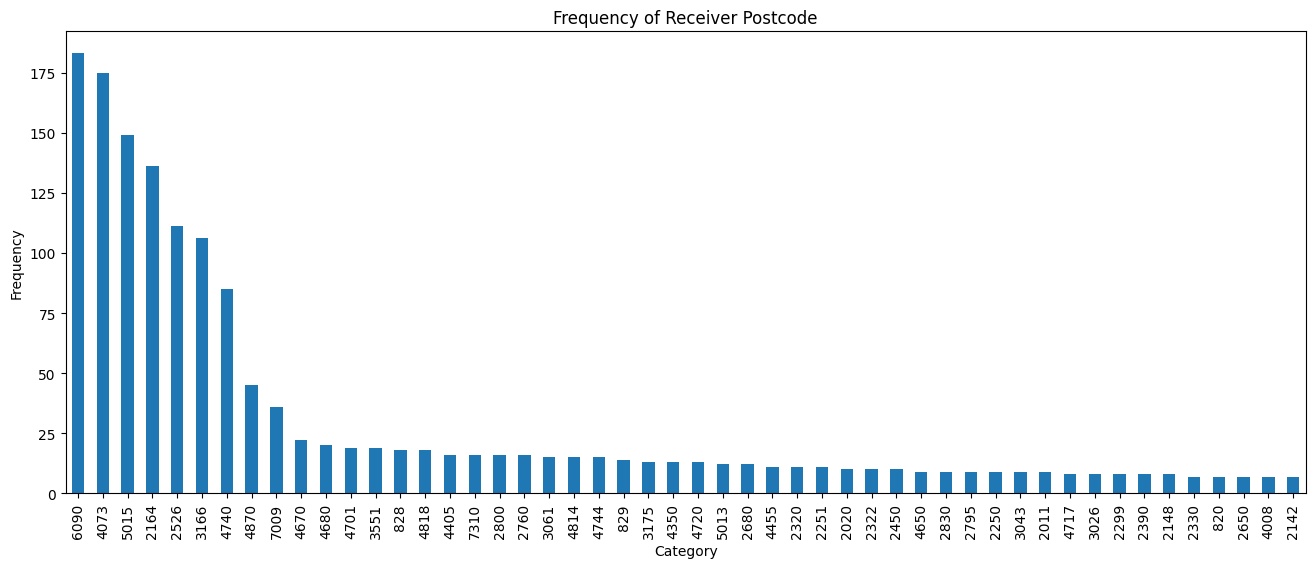

In [9]:
to_value_counts = df['To'].value_counts().head(50) # Top 50 most frequent postcode

plt.figure(figsize=(16, 6))
to_value_counts.plot(kind='bar')

plt.title('Frequency of Receiver Postcode')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [10]:
to_value_counts

To
6090    183
4073    175
5015    149
2164    136
2526    111
3166    106
4740     85
4870     45
7009     36
4670     22
4680     20
4701     19
3551     19
828      18
4818     18
4405     16
7310     16
2800     16
2760     16
3061     15
4814     15
4744     15
829      14
3175     13
4350     13
4720     13
5013     12
2680     12
4455     11
2320     11
2251     11
2020     10
2322     10
2450     10
4650      9
2830      9
2795      9
2250      9
3043      9
2011      9
4717      8
3026      8
2299      8
2390      8
2148      8
2330      7
820       7
2650      7
4008      7
2142      7
Name: count, dtype: int64

### Missing Not at Random (MNAR)

In some cases, customers do not trust the broker or have very high data security measures so they leave out the original cost or carriers or connote number or a combination. Also some carriers deliberately leave some details oout from their statements so their customers can't use that source to shop around.

The missing data is related to the value of the data that is missing. The chance of missingness is directly related to the unobserved data. In other words, the likelihood that data is missing depends on the value of the data itself, meaning that the missingness is directly related to information we don’t have. `(CITS2402-Lec4)`